In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from nltk.tokenize import word_tokenize as wt
# from collections import Counter
import gensim
# import textblob
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Bidirectional

In [ ]:
df_news = pd.read_csv('/content/gdrive/MyDrive/Dataset/lenta-ru-news.csv')

In [ ]:
df_news

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [ ]:
df_news.topic.value_counts()

Россия               160445
Мир                  136621
Экономика             79528
Спорт                 64413
Культура              53797
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44663
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [ ]:
df_news.date.value_counts()

2019/12/05    284
2019/12/10    281
2016/12/01    278
2019/10/09    276
2019/06/20    275
             ... 
2000/02/27      1
1999/11/20      1
1999/12/26      1
1914/09/18      1
1999/10/03      1
Name: date, Length: 7393, dtype: int64

In [ ]:
df_news['date'] = pd.to_datetime(df_news['date'], format='%Y/%m/%d')

In [ ]:
df_news_2017 = df_news[df_news['date'].dt.year == 2017]

In [ ]:
df_news_2017

,url,title,text,topic,tags,date
638503,https://lenta.ru/news/2017/01/01/mirzaevdelo/,Возбуждено дело по факту избиения Расула Мирзаева,Следственный комитет России возбудил уголовное...,Спорт,Бокс и ММА,2017-01-01
638504,https://lenta.ru/news/2017/01/01/dagestan/,Двое силовиков пострадали в спецоперации в Даг...,В Новолакском районе Дагестана проходит спецоп...,Силовые структуры,Криминал,2017-01-01
638505,https://lenta.ru/news/2017/01/01/39/,Число жертв атаки на ночной клуб в Стамбуле во...,В результате нападения на ночной клуб Reina в ...,Мир,Преступность,2017-01-01
638506,https://lenta.ru/news/2017/01/01/lukashenko/,Лукашенко призвал белорусов держать порох сухим,Президент Белоруссии Александр Лукашенко в нов...,Бывший СССР,Белоруссия,2017-01-01
638507,https://lenta.ru/news/2017/01/01/putin/,Путин отреагировал на теракт в Стамбуле,Президент России Владимир Путин направил турец...,Россия,Политика,2017-01-01
...,...,...,...,...,...,...
697290,https://lenta.ru/news/2017/12/31/protest/,Два человека погибли при погромах в Иране,Два человека погибли в ходе антиправительствен...,Мир,Общество,2017-12-31
697291,https://lenta.ru/news/2017/12/31/mad_russia/,Опубликован трейлер чемпионата мира по футболу...,Издание Bleacher Report в своем Twitter-аккаун...,Спорт,Футбол,2017-12-31
697292,https://lenta.ru/news/2017/12/31/pushkin/,Украинцы украли стоявший с царских времен бюст...,В Чернигове украден бюст русского поэта Алекса...,Бывший СССР,Украина,2017-12-31
697293,https://lenta.ru/news/2017/12/31/vk/,«ВКонтакте» случайно перешла на мову,Социальная сеть «ВКонтакте» разослала пользова...,Интернет и СМИ,Coцсети,2017-12-31


In [ ]:
df_news_2017.reset_index(drop=True, inplace=True)

In [ ]:
df_news_2017.topic.value_counts()

россия               9530
мир                  8732
спорт                5521
силовые структуры    4852
Name: topic, dtype: int64

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Оружие'].index)

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культпросвет'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == '69-я параллель'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Крым'].index)

In [ ]:
df_news_2017.reset_index(drop=True, inplace=True)

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Дом'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Из жизни'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Бизнес'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Путешествия'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Наука и техника'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Ценности'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Экономика'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Интернет и СМИ'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культура'].index)
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Бывший СССР'].index)

In [ ]:
df_news_2017

,url,title,text,topic,tags,date,data
0,https://lenta.ru/news/2017/01/01/mirzaevdelo/,Возбуждено дело по факту избиения Расула Мирзаева,Следственный комитет России возбудил уголовное...,спорт,Бокс и ММА,2017-01-01,Возбуждено дело по факту избиения Расула Мирза...
1,https://lenta.ru/news/2017/01/01/dagestan/,Двое силовиков пострадали в спецоперации в Даг...,В Новолакском районе Дагестана проходит спецоп...,силовые структуры,Криминал,2017-01-01,Двое силовиков пострадали в спецоперации в Даг...
2,https://lenta.ru/news/2017/01/01/39/,Число жертв атаки на ночной клуб в Стамбуле во...,В результате нападения на ночной клуб Reina в ...,мир,Преступность,2017-01-01,Число жертв атаки на ночной клуб в Стамбуле во...
3,https://lenta.ru/news/2017/01/01/putin/,Путин отреагировал на теракт в Стамбуле,Президент России Владимир Путин направил турец...,россия,Политика,2017-01-01,Путин отреагировал на теракт в Стамбуле Презид...
4,https://lenta.ru/news/2017/01/01/russvk/,Опубликовано видео лучших моментов матча Росси...,Появилось видео с лучшими моментами матча моло...,спорт,Хоккей,2017-01-01,Опубликовано видео лучших моментов матча Росси...
...,...,...,...,...,...,...,...
28638,https://lenta.ru/news/2017/12/31/zahoronenie/,Массовые захоронения жертв ИГ обнаружили в Ракке,Два массовых захоронения жертв боевиков террор...,мир,Конфликты,2017-12-31,Массовые захоронения жертв ИГ обнаружили в Рак...
28639,https://lenta.ru/news/2017/12/31/putin/,Появилось новогоднее обращение Путина,В сети появилась видеозапись новогоднего обращ...,россия,Политика,2017-12-31,Появилось новогоднее обращение Путина В сети п...
28640,https://lenta.ru/news/2017/12/31/protest/,Два человека погибли при погромах в Иране,Два человека погибли в ходе антиправительствен...,мир,Общество,2017-12-31,Два человека погибли при погромах в Иране Два ...
28641,https://lenta.ru/news/2017/12/31/mad_russia/,Опубликован трейлер чемпионата мира по футболу...,Издание Bleacher Report в своем Twitter-аккаун...,спорт,Футбол,2017-12-31,Опубликован трейлер чемпионата мира по футболу...


In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'Культпросвет'].index)

In [ ]:
df_news_2017['topic'] = df_news_2017['topic'].str.strip()

In [ ]:
df_news_2017['topic'] = df_news_2017['topic'].str.lower()

In [ ]:
df_news_2017 = df_news_2017.drop(df_news_2017[df_news_2017['topic'] == 'культпросвет'].index)

In [ ]:
df_news_2017['data'] = df_news_2017['title']+' '+df_news_2017['text']

In [ ]:
df_news_2017.drop(columns=['url', 'title', 'text', 'tags', 'date'], inplace=True)

In [ ]:
df_news_2017

,topic,data,data_clean
0,спорт,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...
2,спорт,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...
3,мир,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...
4,россия,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...
...,...,...,...
19838,россия,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...
19839,спорт,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...
19840,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...
19841,спорт,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...


In [ ]:
N = 4500

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'россия'].sample(n=N, random_state=42).index

In [ ]:
len(rows_to_remove)

4500

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
df_news_2017

,topic,data
0,спорт,Возбуждено дело по факту избиения Расула Мирза...
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...
4,спорт,Опубликовано видео лучших моментов матча Росси...
5,мир,Эрдоган назвал цель стамбульского теракта Цель...
6,россия,В МЧС констатировали отсутствие серьезных прои...
...,...,...
28634,россия,На Сахалине пошумели и спалили дотла 25-метров...
28635,спорт,Боксер Дрозд завершил карьеру Российский боксе...
28636,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...
28641,спорт,Опубликован трейлер чемпионата мира по футболу...


In [ ]:
df_news_2017.topic.value_counts()

мир                  5032
россия               5030
спорт                4921
силовые структуры    4852
Name: topic, dtype: int64

In [ ]:
N = 3700

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'мир'].sample(n=N, random_state=42).index

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
N=600

In [ ]:
rows_to_remove = df_news_2017[df_news_2017['topic'] == 'спорт'].sample(n=N, random_state=42).index

In [ ]:
df_news_2017 = df_news_2017.drop(rows_to_remove)

In [ ]:
import re
import string

In [ ]:
def clean_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_news_2017.data.iloc[0]

'Возбуждено дело по\xa0факту избиения Расула Мирзаева Следственный комитет России возбудил уголовное дело по факту нападения на бойца смешанного стиля (ММА) Расула Мирзаева в Москве. Об этом в воскресенье, 1 января, сообщает ТАСС со ссылкой на слова представителя московского главка СКР. «Уголовное дело возбуждено по части 2 статьи 112 УК РФ ("Умышленное причинение средней тяжести вреда здоровью") и части 2 статьи 139 УК РФ ("Нарушение неприкосновенности жилища")», — заявили в управлении. В ночь на 31 декабря 30-летний Мирзаев был избит и ранен из травматического пистолета на улице Восточная. Нападавшие скрылись с места преступления. Бойца госпитализировали и прооперировали, врачи оценили его состояние как нормальное, жизни спортсмена ничего не угрожает. 16 ноября Мирзаев потерпел первое поражение в карьере от американца грузинского происхождения Левана Макашвили. В его активе 17 побед и одно поражение. Имя Расула Мирзаева стало широко обсуждаться в СМИ в августе 2011 года, когда во вре

In [ ]:
df_news_2017['data_clean'] = df_news_2017['data'].apply(clean_text)

In [ ]:
df_news_2017['data_clean'].iloc[0]

'возбуждено дело по факту избиения расула мирзаева следственный комитет россии возбудил уголовное дело по факту нападения на бойца смешанного стиля  мма  расула мирзаева в москве  об этом в воскресенье   января  сообщает тасс со ссылкой на слова представителя московского главка скр   уголовное дело возбуждено по части  статьи  ук рф   умышленное причинение средней тяжести вреда здоровью   и части  статьи  ук рф   нарушение неприкосновенности жилища       заявили в управлении  в ночь на  декабря  летний мирзаев был избит и ранен из травматического пистолета на улице восточная  нападавшие скрылись с места преступления  бойца госпитализировали и прооперировали  врачи оценили его состояние как нормальное  жизни спортсмена ничего не угрожает   ноября мирзаев потерпел первое поражение в карьере от американца грузинского происхождения левана макашвили  в его активе  побед и одно поражение  имя расула мирзаева стало широко обсуждаться в сми в августе  года  когда во время конфликта у московско

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords = stopwords.words("russian")

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
def tokenize(text):
    text_clean = []
    text_tokenized = word_tokenize(text, language="russian")
    for word in text_tokenized:
        if len(word) > 1 and word not in stopwords:
            text_clean.append(word)
    return text_clean

In [ ]:
df_news_2017['tokenized'] = df_news_2017.data_clean.apply(tokenize)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized
0,спорт,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми..."
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да..."
2,спорт,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,..."
3,мир,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта..."
4,россия,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п..."
...,...,...,...,...
19838,россия,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,..."
19839,спорт,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,..."
19840,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе..."
19841,спорт,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо..."


In [ ]:
!pip install pymorphy2

In [ ]:
import pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
word = df_news_2017.tokenized.iloc[0][2]

In [ ]:
word

'факту'

In [ ]:
morph.parse(word)[0].normal_form

'факт'

In [ ]:
def lemmatize(text):
    text_lemmatized = []
    for word in text:
        text_lemmatized.append(morph.parse(word)[0].normal_form)

    return text_lemmatized

In [ ]:
df_news_2017['data_lemmatized'] = df_news_2017.tokenized.apply(lemmatize)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized,data_lemmatized
0,спорт,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми...","[возбудить, дело, факт, избиение, расул, мирза..."
1,силовые структуры,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да...","[двое, силовик, пострадать, спецоперация, даге..."
2,спорт,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,...","[опубликовать, видео, хороший, момент, матч, р..."
3,мир,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта...","[эрдоган, назвать, цель, стамбульский, теракт,..."
4,россия,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п...","[мчс, констатировать, отсутствие, серьёзный, п..."
...,...,...,...,...,...
19838,россия,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,...","[сахалин, пошуметь, спалить, дотла, метровый, ..."
19839,спорт,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,...","[боксёр, дрозд, завершить, карьера, российский..."
19840,спорт,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе...","[нападать, манчестер, сити, заплакать, получит..."
19841,спорт,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо...","[опубликовать, трейлер, чемпионат, мир, футбол..."


In [ ]:
from nltk.probability import FreqDist

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase:
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

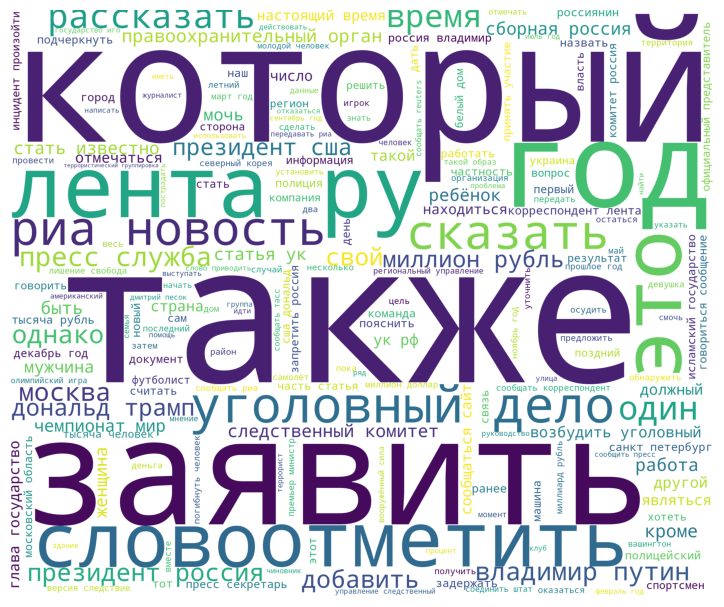

In [ ]:
corpus = get_corpus(df_news_2017['data_lemmatized'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [ ]:
freq = nltk.FreqDist(corpus)

In [ ]:
freq.most_common(10)

[('год', 25541),
 ('россия', 19338),
 ('который', 16254),
 ('российский', 9465),
 ('также', 9060),
 ('человек', 9019),
 ('заявить', 8985),
 ('сообщать', 8711),
 ('сша', 8695),
 ('президент', 8597)]

In [ ]:
freq_russia = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='россия'].values))

In [ ]:
freq_russia.most_common(10)

[('год', 6246),
 ('россия', 5753),
 ('который', 4547),
 ('президент', 3138),
 ('человек', 3081),
 ('глава', 2653),
 ('москва', 2631),
 ('также', 2575),
 ('путин', 2518),
 ('область', 2500)]

In [ ]:
freq_world = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='мир'].values))

In [ ]:
freq_world.most_common(10)

[('сша', 5722),
 ('год', 5115),
 ('россия', 4945),
 ('который', 4667),
 ('президент', 3975),
 ('трамп', 3738),
 ('человек', 3542),
 ('страна', 3476),
 ('заявить', 3323),
 ('сообщать', 3044)]

In [ ]:
freq_sport = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='спорт'].values))

In [ ]:
freq_sport.most_common(10)

[('год', 5300),
 ('матч', 4548),
 ('россия', 4036),
 ('команда', 3271),
 ('чемпионат', 3256),
 ('российский', 3167),
 ('сборная', 3148),
 ('который', 3106),
 ('мир', 2722),
 ('клуб', 2330)]

In [ ]:
freq_power = nltk.FreqDist(get_corpus(df_news_2017['data_lemmatized']
                                         [df_news_2017['topic']=='силовые структуры'].values))

In [ ]:
freq_power.most_common(10)

[('год', 8871),
 ('россия', 4602),
 ('дело', 4198),
 ('который', 3928),
 ('сообщить', 3449),
 ('суд', 2903),
 ('задержать', 2646),
 ('военный', 2621),
 ('также', 2508),
 ('уголовный', 2457)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def join_list(text):
    return ' '.join(text)

In [ ]:
df_news_2017['text_joined'] = df_news_2017.data_lemmatized.apply(join_list)

In [ ]:
df_news_2017

,topic,data,data_clean,tokenized,data_lemmatized,text_joined
0,2.0,Возбуждено дело по факту избиения Расула Мирза...,возбуждено дело по факту избиения расула мирза...,"[возбуждено, дело, факту, избиения, расула, ми...","[возбудить, дело, факт, избиение, расул, мирза...",возбудить дело факт избиение расул мирзаева сл...
1,3.0,Двое силовиков пострадали в спецоперации в Даг...,двое силовиков пострадали в спецоперации в даг...,"[двое, силовиков, пострадали, спецоперации, да...","[двое, силовик, пострадать, спецоперация, даге...",двое силовик пострадать спецоперация дагестан ...
2,2.0,Опубликовано видео лучших моментов матча Росси...,опубликовано видео лучших моментов матча росси...,"[опубликовано, видео, лучших, моментов, матча,...","[опубликовать, видео, хороший, момент, матч, р...",опубликовать видео хороший момент матч россия ...
3,1.0,Эрдоган назвал цель стамбульского теракта Цель...,эрдоган назвал цель стамбульского теракта цель...,"[эрдоган, назвал, цель, стамбульского, теракта...","[эрдоган, назвать, цель, стамбульский, теракт,...",эрдоган назвать цель стамбульский теракт цель ...
4,0.0,В МЧС констатировали отсутствие серьезных прои...,в мчс констатировали отсутствие серьезных прои...,"[мчс, констатировали, отсутствие, серьезных, п...","[мчс, констатировать, отсутствие, серьёзный, п...",мчс констатировать отсутствие серьёзный происш...
...,...,...,...,...,...,...
19838,0.0,На Сахалине пошумели и спалили дотла 25-метров...,на сахалине пошумели и спалили дотла метровую...,"[сахалине, пошумели, спалили, дотла, метровую,...","[сахалин, пошуметь, спалить, дотла, метровый, ...",сахалин пошуметь спалить дотла метровый ёлка ц...
19839,2.0,Боксер Дрозд завершил карьеру Российский боксе...,боксер дрозд завершил карьеру российский боксе...,"[боксер, дрозд, завершил, карьеру, российский,...","[боксёр, дрозд, завершить, карьера, российский...",боксёр дрозд завершить карьера российский бокс...
19840,2.0,Нападающий «Манчестер Сити» заплакал из-за пол...,нападающий манчестер сити заплакал из за пол...,"[нападающий, манчестер, сити, заплакал, получе...","[нападать, манчестер, сити, заплакать, получит...",нападать манчестер сити заплакать получить тра...
19841,2.0,Опубликован трейлер чемпионата мира по футболу...,опубликован трейлер чемпионата мира по футболу...,"[опубликован, трейлер, чемпионата, мира, футбо...","[опубликовать, трейлер, чемпионат, мир, футбол...",опубликовать трейлер чемпионат мир футбол стил...


In [ ]:
df_news_2017.topic.replace({
    'россия': 0,
    'мир': 1,
    'спорт': 2,
    'силовые структуры': 3,
}, inplace = True)

In [ ]:
x = df_news_2017['text_joined']

In [ ]:
y = df_news_2017['topic']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=47)

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [ ]:
tfidf_train.shape, tfidf_test.shape

((15868, 52697), (3967, 52697))

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df_news_2017.dropna(inplace=True)

In [ ]:
pac = PassiveAggressiveClassifier(random_state = 42, loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

PassiveAggressiveClassifier(C=0.16, loss='squared_hinge', max_iter=50,
                            random_state=42)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 90.87%


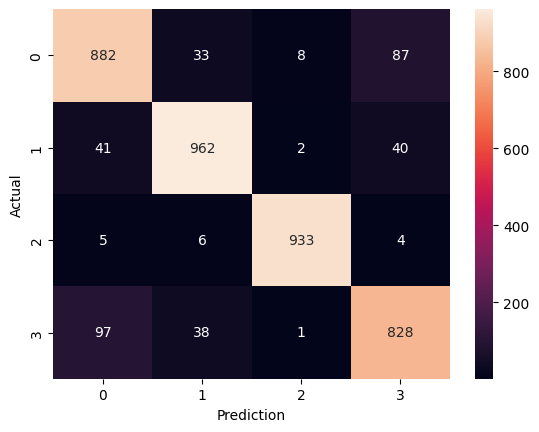

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
sns.set_theme(style='white')
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()